<a href="https://colab.research.google.com/github/DollyVishnu/fmml-lab/blob/main/Copy_of_FMML_Module4_Lab1_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

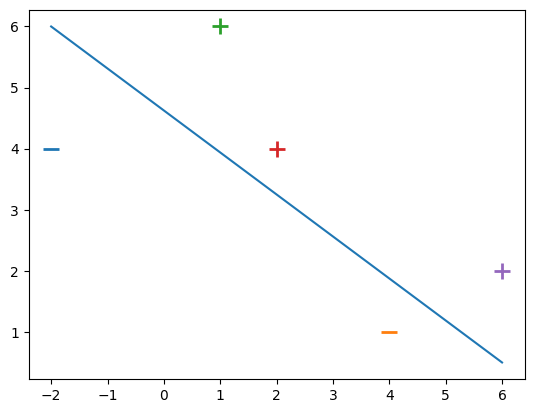

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

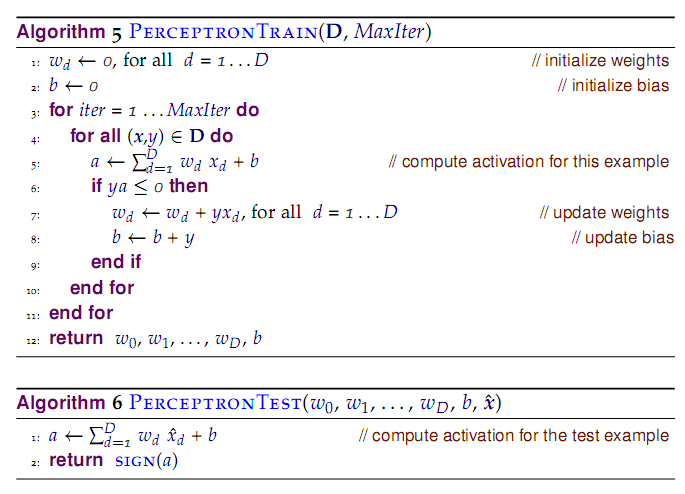

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

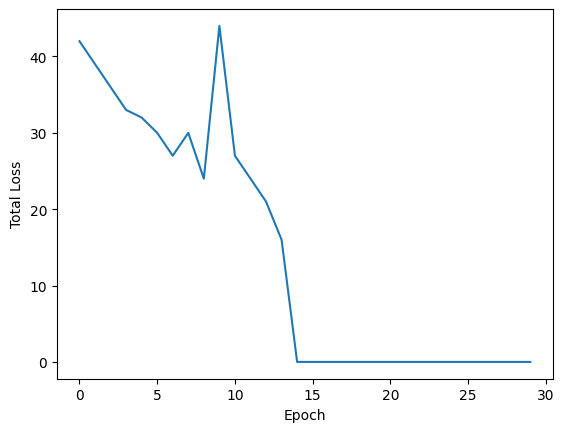

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

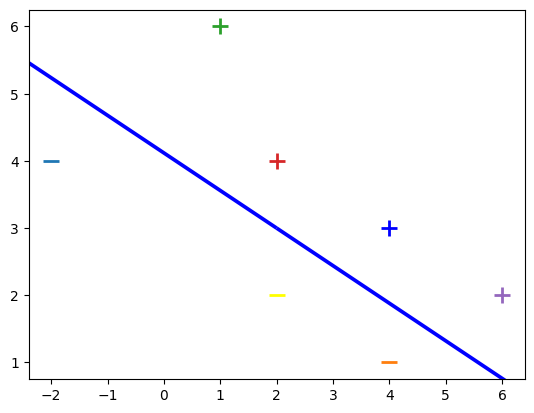

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



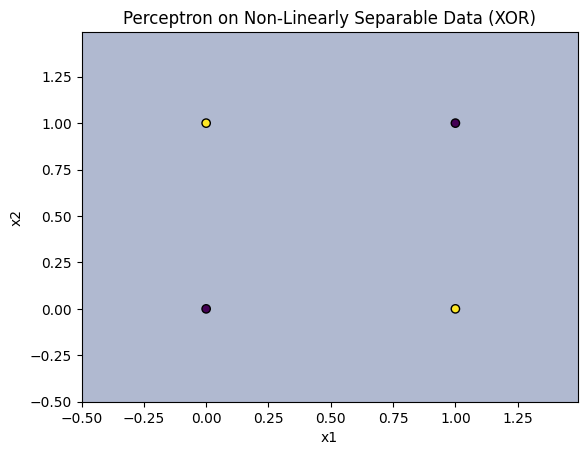

Learned weights: [[0. 0.]]
Learned bias: [0.]
Predictions: [-1 -1 -1 -1]
Actuals: [-1  1  1 -1]
Accuracy: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Non-linearly separable dataset (XOR-like)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, -1])  # XOR pattern

# Initialize Perceptron
perceptron = Perceptron(random_state=42, max_iter=1000) # Added max_iter

# Train the Perceptron
perceptron.fit(X, y)

# Plot the data and decision boundary (if it exists)
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4) # Filled contours
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k') # Data points
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


plot_decision_boundary(X, y, perceptron, "Perceptron on Non-Linearly Separable Data (XOR)")

# Print the learned weights and bias (if they exist)
print("Learned weights:", perceptron.coef_)
print("Learned bias:", perceptron.intercept_)


# Check predictions
predictions = perceptron.predict(X)
print("Predictions:", predictions)
print("Actuals:", y)

# Calculate and print the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?


Training with learning rate: 0.01
Converged in 9 iterations!
Learned weights: [0.03 0.02]
Learned bias: -0.04
Input: [0 0], True: -1, Predicted: -1.0
Input: [0 1], True: -1, Predicted: -1.0
Input: [1 0], True: -1, Predicted: -1.0
Input: [1 1], True: 1, Predicted: 1.0

Training with learning rate: 0.1
Converged in 4 iterations!
Learned weights: [0.2 0.1]
Learned bias: -0.20000000000000004
Input: [0 0], True: -1, Predicted: -1.0
Input: [0 1], True: -1, Predicted: -1.0
Input: [1 0], True: -1, Predicted: -1.0
Input: [1 1], True: 1, Predicted: 1.0

Training with learning rate: 1
Converged in 9 iterations!
Learned weights: [3 2]
Learned bias: -4
Input: [0 0], True: -1, Predicted: -1
Input: [0 1], True: -1, Predicted: -1
Input: [1 0], True: -1, Predicted: -1
Input: [1 1], True: 1, Predicted: 1

Training with learning rate: 10
Converged in 9 iterations!
Learned weights: [30 20]
Learned bias: -40
Input: [0 0], True: -1, Predicted: -1
Input: [0 1], True: -1, Predicted: -1
Input: [1 0], True: -1

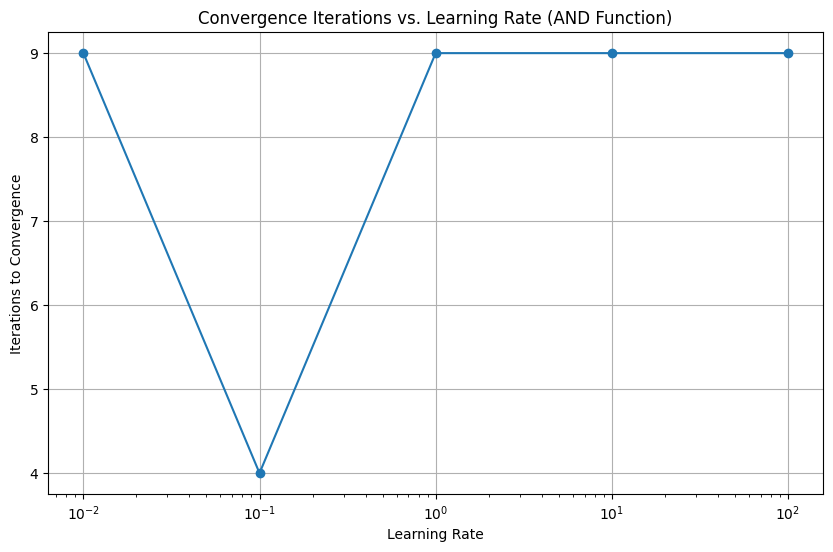

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset (AND function)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, -1, -1, 1])

# Initialize weights and bias
w = np.array([0, 0])
b = 0

def perceptron_step(x, y, w, b, learning_rate): # Learning rate is a parameter
    y_pred = np.sign(np.dot(w, x) + b)
    if y != y_pred:
        w = w + learning_rate * y * x
        b = b + learning_rate * y
        return w, b, True
    return w, b, False

def perceptron_train(X, y, w, b, learning_rate, max_iterations=100): # Learning rate is a parameter
    iterations = 0
    for _ in range(max_iterations):
        updated = False
        for i in range(len(X)):
            w, b, was_updated = perceptron_step(X[i], y[i], w, b, learning_rate)
            updated = updated or was_updated
        iterations += 1 # Count iterations
        if not updated:
            print(f"Converged in {iterations} iterations!")
            return w, b, iterations
    print(f"Did not converge within {max_iterations} iterations.")
    return w, b, iterations

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 1, 10, 100] # Added variety
convergence_iterations = []

for lr in learning_rates:
    w = np.array([0, 0])  # Re-initialize for each learning rate
    b = 0
    print(f"\nTraining with learning rate: {lr}")
    w, b, iterations = perceptron_train(X, y, w, b, lr)
    convergence_iterations.append(iterations)
    print("Learned weights:", w)
    print("Learned bias:", b)

    # Verification (testing on the training data)
    for i in range(len(X)):
        y_pred = np.sign(np.dot(w, X[i]) + b)
        print(f"Input: {X[i]}, True: {y[i]}, Predicted: {y_pred}")

# Plotting convergence iterations vs. learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, convergence_iterations, marker='o')
plt.xscale('log') # Log scale for x-axis (learning rate)
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Convergence')
plt.title('Convergence Iterations vs. Learning Rate (AND Function)')
plt.grid(True)
plt.show()

Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Sonar dataset
try:
    data = pd.read_csv("sonar.all-data", header=None)
except FileNotFoundError:
    print("Please download the Sonar dataset (sonar.all-data) and place it in the same directory as this script.")
    exit()

# Separate features (X) and target (y)
X = data.iloc[:, :-1].values  # This is often correct
y = data.iloc[:, -1].values

# Convert labels to numerical (0 and 1)
y = np.where(y == 'R', 0, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added train test split

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit and transform on training data
X_test = scaler.transform(X_test)     # Transform test data using the training fit

# Train the Perceptron
perceptron = Perceptron(random_state=42)  # Added random_state for reproducibility
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

# Plotting (Optional - useful for visualization in 2D, but Sonar data is high-dimensional)
# Since the Sonar dataset is high-dimensional, we can't directly plot the decision boundary.
# However, we can plot the training error over epochs (if you want to see how it decreases).

# Example of plotting training error vs. epochs (if you want to implement this):
# errors = []
# for epoch in range(1, max_epochs + 1):
#     perceptron.max_iter = epoch # Set max_iter for each epoch
#     perceptron.fit(X_train, y_train)
#     y_train_pred = perceptron.predict(X_train)
#     error = mean_squared_error(y_train, y_train_pred)
#     errors.append(error)

# plt.plot(range(1, max_epochs + 1), errors)
# plt.xlabel("Epochs")
# plt.ylabel("Training Mean Squared Error")
# plt.title("Perceptron Training Error vs. Epochs (Sonar Dataset)")
# plt.grid(True)
# plt.show()

# If you want to plot something for the test set, you could plot the actual vs. predicted values
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, label = "Actual", marker = 'o')
plt.scatter(range(len(y_test)), y_pred, label = "Predicted", marker = 'x')
plt.xlabel("Data Point Index")
plt.ylabel("Class")
plt.title("Actual vs. Predicted classes on the Test Set (Sonar Dataset)")
plt.legend()
plt.grid(True)
plt.show()

Please download the Sonar dataset (sonar.all-data) and place it in the same directory as this script.


NameError: name 'data' is not defined

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

NameError: name 'np' is not defined

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


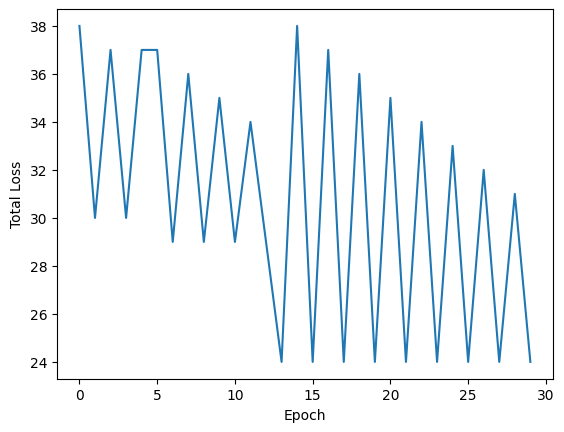

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

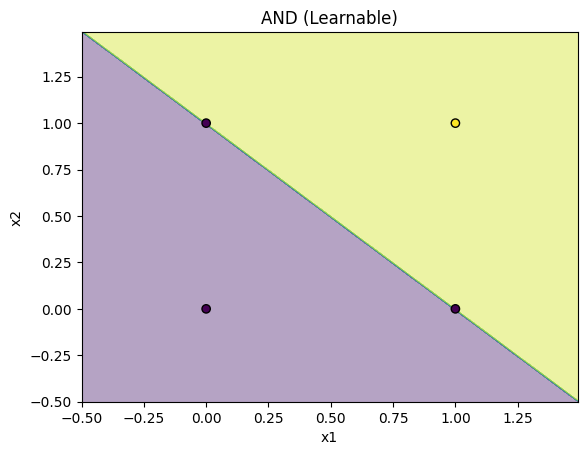

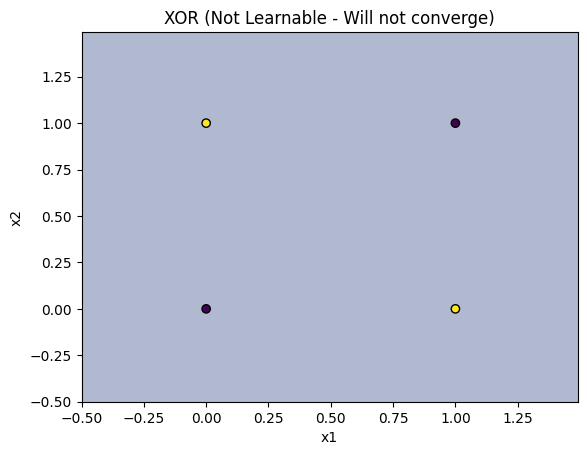

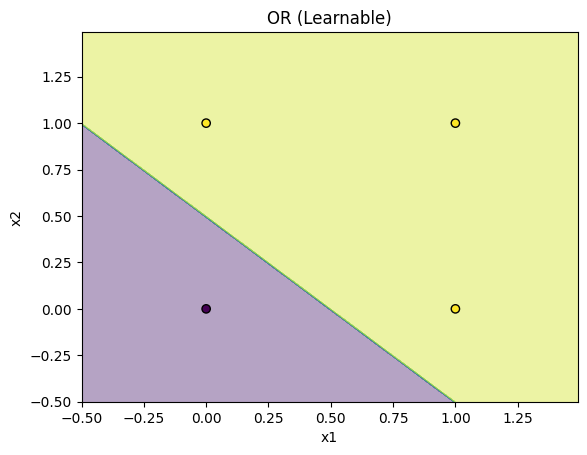

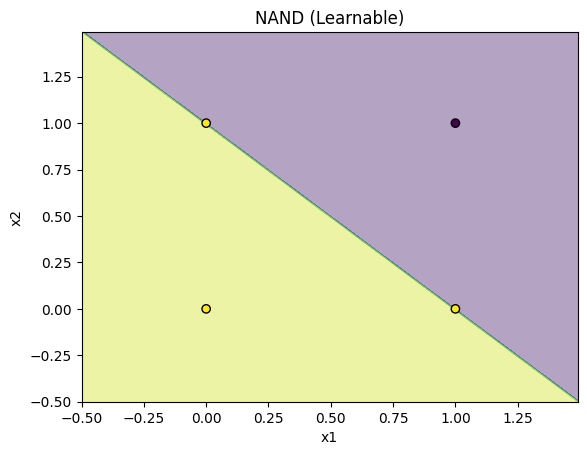

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# All possible 2-bit binary inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Function to visualize decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# Demonstrate learnable function (AND)
y_and = np.array([0, 0, 0, 1])
perceptron_and = Perceptron()
perceptron_and.fit(X, y_and)
plot_decision_boundary(X, y_and, perceptron_and, "AND (Learnable)")

# Demonstrate non-learnable function (XOR)
y_xor = np.array([0, 1, 1, 0])
perceptron_xor = Perceptron()
perceptron_xor.fit(X, y_xor) # Perceptron will not converge for XOR
plot_decision_boundary(X, y_xor, perceptron_xor, "XOR (Not Learnable - Will not converge)")


# Demonstrate another learnable function (OR)
y_or = np.array([0, 1, 1, 1])
perceptron_or = Perceptron()
perceptron_or.fit(X, y_or)
plot_decision_boundary(X, y_or, perceptron_or, "OR (Learnable)")


# Demonstrate another learnable function (NAND)
y_nand = np.array([1, 1, 1, 0])
perceptron_nand = Perceptron()
perceptron_nand.fit(X, y_nand)
plot_decision_boundary(X, y_nand, perceptron_nand, "NAND (Learnable)")

Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.

In [ ]:
import numpy as np

# Dataset (AND function)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, -1, -1, 1])  # -1 for negative, 1 for positive

# Initialize weights and bias
w = np.array([0, 0])
b = 0
learning_rate = 1

def perceptron_step(x, y, w, b):
    y_pred = np.sign(np.dot(w, x) + b)  # Prediction
    if y != y_pred:  # Misclassification
        w = w + learning_rate * y * x
        b = b + learning_rate * y
        return w, b, True # Return True if weights updated
    return w, b, False # Return False if weights not updated

def perceptron_train(X, y, w, b, max_iterations=10):
    for _ in range(max_iterations):
        updated = False # Flag to check if any weights were updated in this iteration
        for i in range(len(X)):
            w, b, was_updated = perceptron_step(X[i], y[i], w, b)
            updated = updated or was_updated # Update flag
        if not updated: # If no weights were updated, we have converged
            print("Converged!")
            return w, b
    print("Did not converge within max iterations") # If we reach max iterations and still updating
    return w, b


w, b = perceptron_train(X, y, w, b)

print("Learned weights:", w)
print("Learned bias:", b)

# Verification (testing on the training data)
for i in range(len(X)):
    y_pred = np.sign(np.dot(w, X[i]) + b)
    print(f"Input: {X[i]}, True: {y[i]}, Predicted: {y_pred}")

Converged!
Learned weights: [3 2]
Learned bias: -4
Input: [0 0], True: -1, Predicted: -1
Input: [0 1], True: -1, Predicted: -1
Input: [1 0], True: -1, Predicted: -1
Input: [1 1], True: 1, Predicted: 1
